# Determining how Various Factors are Associated with Prosper Loan Rating


## By Idenyi, Chinazor J.

## Introduction

This project will focus on finding out the features/factors that are associated with various prosper rating of loans. The ProsperLoanData which will be used in this project contains 81 columns of information about 113,937 prosper loans listed in various cities, over a period of 6 years(2009 - 2014). The data will be cleaned, analyzed and the conclusions made. 

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
# Reading in the prosper loan data file 
df_old=pd.read_csv('C://Users/e7450/downloads/prosperLoanData.csv')

In [3]:
# Confirming that the dataset has been loaded
df_old.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


## Data Wrangling and Cleaning

In [4]:
# checking the dimension of the dataframe
df_old.shape

(113937, 81)

In [5]:
# Getting info about the dataset
df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
# Looking at some samples of the dataframe 
df_old.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
73468,32DB35513642764051DD45A,608216,2012-07-06 08:00:50.843000000,NaN,60,Current,NaN,0.28704,0.2610,0.2510,...,-58.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,23
109582,26AD339987634869388288A,197851,2007-09-05 15:42:11.620000000,D,36,Completed,2010-09-11 00:00:00,0.25903,0.2400,0.2300,...,-17.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,15
78822,F5B235943639413425476F4,1012786,2013-11-22 13:27:36.240000000,NaN,60,Current,NaN,0.16969,0.1465,0.1365,...,-24.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
36012,CB6A35434629806807B436F,570433,2012-03-20 16:25:54.473000000,NaN,36,Completed,2014-01-09 00:00:00,0.35797,0.3177,0.3077,...,-56.69,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
50492,EDC4358135269984814DE49,805367,2013-06-11 21:22:37.827000000,NaN,36,Current,NaN,0.35356,0.3134,0.3034,...,-12.45,0.0,0.0,0.0,0.0,1.0,0,0,0.0,23


### What is the structure of your dataset?

The dataset to be used in this project is the ProsperLoanData dataset. It contains 113,937 rows as well as 81 columns. It contains information about prosper loans, its lenders and borrowers in various cities, for a period of 6 years(2009 - 2014). Information contained include prosper score, prosper rating (alpha), prosper rating (num), loan status, loan term, loan original amout, borrower's occupation, employment status, stated monthly income etc.

### What is/are the main feature(s) of interest in your dataset?

I am interested in finding out the features that are associated with/determine the prosper rating of loans.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Prosper rating is the dependent variable of interest. It has been rendered in both numeric (prosperrating (num)) and alphabetical form (prosperrating (alpha)). It goes from the best rate- 1 (AA) to the least- 7(HR).<br>

Other features/variables that will support this investigation include borrower rate and stated monthly income. I expect that borrower rate will have a negative relationship with prosper rating, I also expect that loans given to borrowers with higher stated monthly income would have higher prosper rating. I will also explore other features (original amount borrowed, available bank card credit, employment status, occupation, term of loan borrowed, year of borrowing) to determine their association with prosper rating.


## Cleaning

To begin cleaning the dataset, we make a copy of the data frame, then take care of the following issues: <br>
1. Changing all column names to lowercase <br>
2. Dropping columns which are not relevant to the analysis <br>
3. Dropping rows with null values in the prosper score column <br>
4. Changing the prosperrating (numeric) and prosperscore columns to int data type. <br>
5. Converting the prosperscore and prosperrating(alpha) columns to ordered category datatype<br>
6. Creating new columns for year and month of loan origination
7. Renaming prosperrating (numeric), prosperrating (alpha) and listingcategory (numeric) columns for easy navigation.


In [7]:
# Making a copy of the dataframe to use for exploration and analysis 
df = df_old.copy()

In [8]:
# Confirming the copy was made successfully
df.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [9]:
# Changing all column names to lowercase
df.columns= df.columns.str.lower()

In [10]:
# Confirm that column names are now all lowercase
df.head(1)

,listingkey,listingnumber,listingcreationdate,creditgrade,term,loanstatus,closeddate,borrowerapr,borrowerrate,lenderyield,...,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [11]:
# Dropping columns which are not relevant to the analysis
cols = [0,1,2,3,6,7,10,11,12,17,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,48,50,51,52,53,54,55,56,57,58,59,60,62,65,66,68,69,70,71,72,73,74,75,76,77,78,79]
df.drop(df.columns[cols], axis=1, inplace=True)

In [12]:
# A look at the size of the dataframe after dropping several columns
df.shape

(113937, 18)

In [13]:
# Getting info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   term                        113937 non-null  int64  
 1   loanstatus                  113937 non-null  object 
 2   borrowerrate                113937 non-null  float64
 3   lenderyield                 113937 non-null  float64
 4   prosperrating (numeric)     84853 non-null   float64
 5   prosperrating (alpha)       84853 non-null   object 
 6   prosperscore                84853 non-null   float64
 7   listingcategory (numeric)   113937 non-null  int64  
 8   occupation                  110349 non-null  object 
 9   employmentstatus            111682 non-null  object 
 10  availablebankcardcredit     106393 non-null  float64
 11  incomerange                 113937 non-null  object 
 12  statedmonthlyincome         113937 non-null  float64
 13  loanmonthssinc

In [14]:
# Checking if there are duplicated rows
df.duplicated().sum()

0

In [15]:
# Checkng for null values
df.isnull().sum()

term                              0
loanstatus                        0
borrowerrate                      0
lenderyield                       0
prosperrating (numeric)       29084
prosperrating (alpha)         29084
prosperscore                  29084
listingcategory (numeric)         0
occupation                     3588
employmentstatus               2255
availablebankcardcredit        7544
incomerange                       0
statedmonthlyincome               0
loanmonthssinceorigination        0
loanoriginalamount                0
loanoriginationdate               0
monthlyloanpayment                0
investors                         0
dtype: int64

Prosper rating is the dependent variable in this analysis. In order to ensure a smooth analysis, we shall drop rows where there are null values recorded for prosperrating.

In [16]:
# Excluding rows with null values in the prosper score column 
df = df[df['prosperrating (numeric)'].notnull()]

In [17]:
# Confirming that the rows with null values in the prosper score column have been dropped
df.isnull().sum()

term                             0
loanstatus                       0
borrowerrate                     0
lenderyield                      0
prosperrating (numeric)          0
prosperrating (alpha)            0
prosperscore                     0
listingcategory (numeric)        0
occupation                    1333
employmentstatus                 0
availablebankcardcredit          0
incomerange                      0
statedmonthlyincome              0
loanmonthssinceorigination       0
loanoriginalamount               0
loanoriginationdate              0
monthlyloanpayment               0
investors                        0
dtype: int64

In [18]:
# Dimension of dataframe after dropping some rows
df.shape

(84853, 18)

We need to change the prosper rating(numeric) and prosper score columns to int in order to remove the decimal and then convert the prosperscore and prosperrating(alpha) columns to ordered category datatype.

In [19]:
# Converting prosperrating (numeric) and prosperscore to integer data type
df['prosperrating (numeric)']= df['prosperrating (numeric)'].apply(np.int64)
df['prosperscore']= df['prosperscore'].apply(np.int64)

In [20]:
# Confirming that the prosperscore column is now of integer data type
df.prosperscore.unique()

array([ 7,  9,  4, 10,  2, 11,  8,  5,  3,  6,  1], dtype=int64)

In [21]:
# Confirming that the prosperrating (numeric) column is now of integer data type
df['prosperrating (numeric)'].unique()

array([6, 3, 5, 2, 4, 7, 1], dtype=int64)

In [22]:
# A look at the prosperrating (alpha) 
df['prosperrating (alpha)'].unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [23]:
# Converting prosperscore and prosperrating(alpha) columns to ordered category datatype
score_class = [1,2,3,4,5,6,7,8,9,10,11]
scores = pd.api.types.CategoricalDtype(ordered = True, categories = score_class)
df['prosperscore'] = df['prosperscore'].astype(scores)

rating_group = ['HR','E','D','C','B','A','AA']
rating = pd.api.types.CategoricalDtype(ordered = True, categories = rating_group)
df['prosperrating (alpha)'] = df['prosperrating (alpha)'].astype(rating)

In [24]:
# Confirming the data type change to category data type
df.prosperscore.dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ordered=True)

In [25]:
# Confirming the data type change to category data type
df['prosperrating (alpha)'].dtypes

CategoricalDtype(categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)

We will be creating new columns from the originalloandate column. These columns are to contain the original loan year and the original loan month 

In [26]:
# Creating new columns
df[['loan_year', 'loan_month', 'loan_day']]= df['loanoriginationdate'].str.split('-',expand=True)

In [27]:
# Checking to see that the new columns have been created
df.head(1)

,term,loanstatus,borrowerrate,lenderyield,prosperrating (numeric),prosperrating (alpha),prosperscore,listingcategory (numeric),occupation,employmentstatus,...,incomerange,statedmonthlyincome,loanmonthssinceorigination,loanoriginalamount,loanoriginationdate,monthlyloanpayment,investors,loan_year,loan_month,loan_day
1,36,Current,0.092,0.082,6,A,7,2,Professional,Employed,...,"$50,000-74,999",6125.0,0,10000,2014-03-03 00:00:00,318.93,1,2014,03,03 00:00:00


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   term                        84853 non-null  int64   
 1   loanstatus                  84853 non-null  object  
 2   borrowerrate                84853 non-null  float64 
 3   lenderyield                 84853 non-null  float64 
 4   prosperrating (numeric)     84853 non-null  int64   
 5   prosperrating (alpha)       84853 non-null  category
 6   prosperscore                84853 non-null  category
 7   listingcategory (numeric)   84853 non-null  int64   
 8   occupation                  83520 non-null  object  
 9   employmentstatus            84853 non-null  object  
 10  availablebankcardcredit     84853 non-null  float64 
 11  incomerange                 84853 non-null  object  
 12  statedmonthlyincome         84853 non-null  float64 
 13  loanmonthssince

In [29]:
# Dropping the loanoriginationdate and the newly created loan_day columns
df.drop('loanoriginationdate', axis=1, inplace=True)
df.drop('loan_day', axis=1, inplace=True)

In [30]:
# Confirming drop of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   term                        84853 non-null  int64   
 1   loanstatus                  84853 non-null  object  
 2   borrowerrate                84853 non-null  float64 
 3   lenderyield                 84853 non-null  float64 
 4   prosperrating (numeric)     84853 non-null  int64   
 5   prosperrating (alpha)       84853 non-null  category
 6   prosperscore                84853 non-null  category
 7   listingcategory (numeric)   84853 non-null  int64   
 8   occupation                  83520 non-null  object  
 9   employmentstatus            84853 non-null  object  
 10  availablebankcardcredit     84853 non-null  float64 
 11  incomerange                 84853 non-null  object  
 12  statedmonthlyincome         84853 non-null  float64 
 13  loanmonthssince

In [31]:
# Changing data type of loan year from object to integer to ease analysis
df['loan_year'] = df['loan_year'].astype ("int64")

In [32]:
# Confirming the data type 
df.loan_year.dtype

dtype('int64')

In [33]:
# Renaming prosperrating (numeric), prosperrating (alpha) and listingcategory (numeric) columns for easy navigation
df.rename(columns={'prosperrating (numeric)' :'prosperrating_num', 'prosperrating (alpha)' :'prosperrating_alpha', 'listingcategory (numeric)' :'listingcategory'}, inplace = True)

In [34]:
# Confirming renaming of columns
df.head(0)

,term,loanstatus,borrowerrate,lenderyield,prosperrating_num,prosperrating_alpha,prosperscore,listingcategory,occupation,employmentstatus,availablebankcardcredit,incomerange,statedmonthlyincome,loanmonthssinceorigination,loanoriginalamount,monthlyloanpayment,investors,loan_year,loan_month


## Data Exploration

## Univariate

Let us first visualize the relevant qualitaitive variables

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   term                        84853 non-null  int64   
 1   loanstatus                  84853 non-null  object  
 2   borrowerrate                84853 non-null  float64 
 3   lenderyield                 84853 non-null  float64 
 4   prosperrating_num           84853 non-null  int64   
 5   prosperrating_alpha         84853 non-null  category
 6   prosperscore                84853 non-null  category
 7   listingcategory             84853 non-null  int64   
 8   occupation                  83520 non-null  object  
 9   employmentstatus            84853 non-null  object  
 10  availablebankcardcredit     84853 non-null  float64 
 11  incomerange                 84853 non-null  object  
 12  statedmonthlyincome         84853 non-null  float64 
 13  loanmonthssince

Visualizing the dependent variable and more

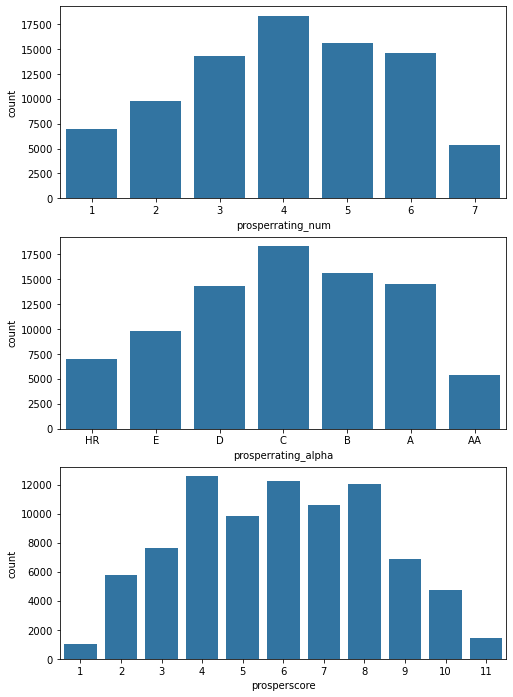

In [36]:
# Visualizing prosper rating and prosper score

fig, ax = plt.subplots(nrows=3, figsize = [8,12])

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'prosperrating_num', color = base_color, ax = ax[0])
sb.countplot(data = df, x = 'prosperrating_alpha', color = base_color, ax = ax[1])
sb.countplot(data = df, x = 'prosperscore', color = base_color, ax = ax[2])


plt.show()

Prosperrating_num and prosperrating_alpha are exactly the same ordinal data with 7 as the best numerical rating and AA as the best alphabetical ranking. 1 is the least numerical and HR is the least alphabetical rating.<br>

Both prosper score and prosper rating seem to follow same trend, the best and worst prosper score and rating are the least obtained, while the central scores and ratings were obtained by more borrowers.<br>


We now look at the employment status of these borrowers

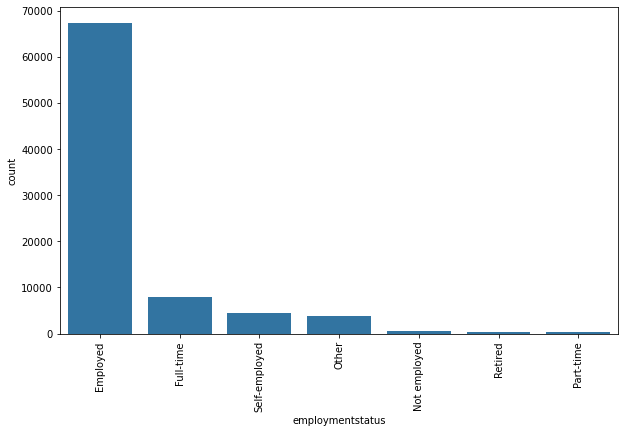

In [37]:
# Visualizing the employment status of borrowers

plt.figure(figsize = [10,6])
sort_emp= df.employmentstatus.value_counts().index
color = sb.color_palette()[0]
sb.countplot(data = df, x= 'employmentstatus', color= color, order=sort_emp)
plt.xticks(rotation=90);

From the bar chart above, we see that more than half of the borrowers are employed. The unemployed are very few, and the least borrwers are part-time workers.<br>

Now, let us look at occupation of the individuals sampled and see which of the occupational groups borrow more or less. 

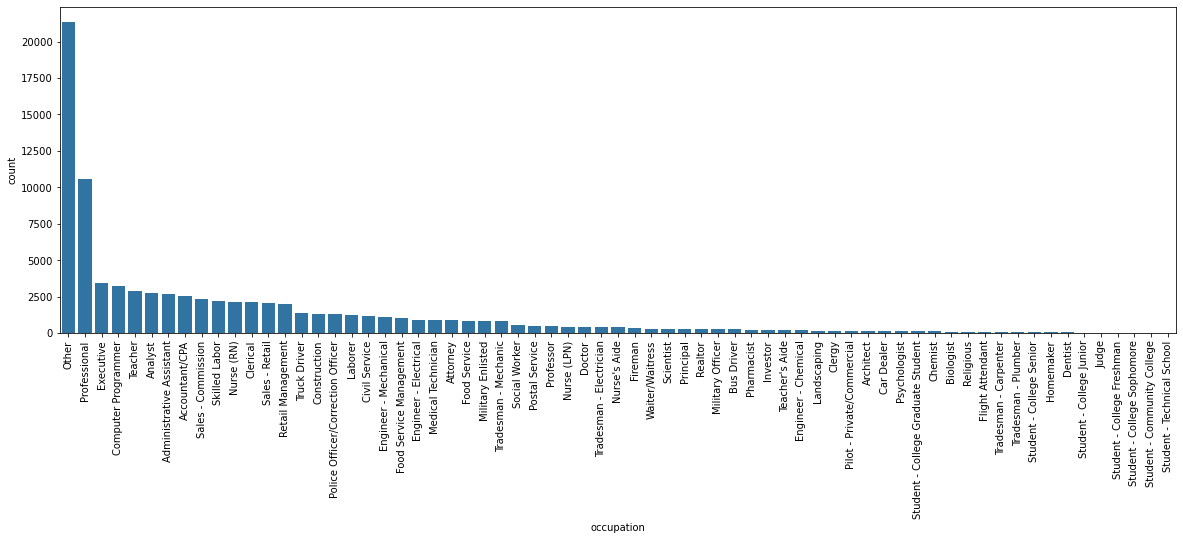

In [38]:
# Plotting all occupations featured

plt.figure(figsize = [20,6])
sort_occ= df.occupation.value_counts().index
color = sb.color_palette()[0]
sb.countplot(data = df, x= 'occupation', color= color, order=sort_occ)
plt.xticks(rotation=90);

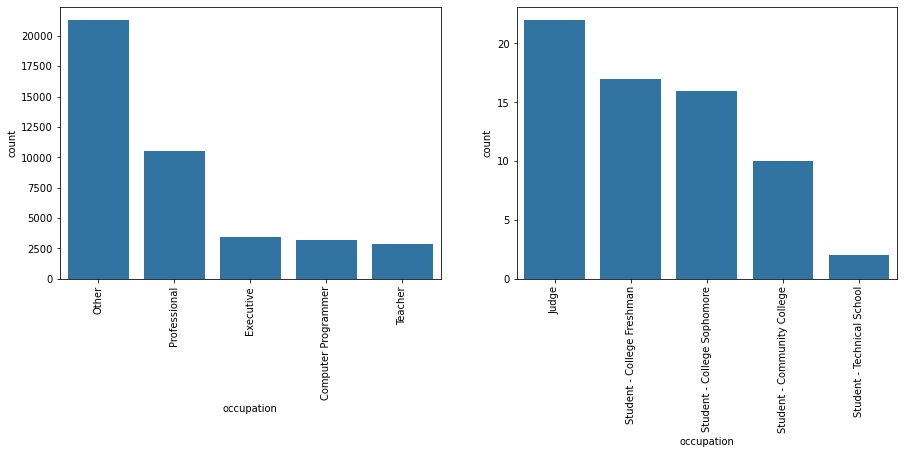

In [39]:
# Plotting the top five borrowing occupations and the bottom five

plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
sort_occ= df.occupation.value_counts().head().index
color = sb.color_palette()[0]
sb.countplot(data = df, x= 'occupation', color= color, order=sort_occ)
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sort_occ= df.occupation.value_counts().tail().index
color = sb.color_palette()[0]
sb.countplot(data = df, x= 'occupation', color= color, order=sort_occ)
plt.xticks(rotation=90);

First, notice the difference in the scaling of both charts. Individuals who fall in the other occupation types not captured are significantly the highest borrowers, having their number more than twice the second highest borrowing occupation: professionals. <br>

Judges are the fifth lowest borrowers. The lowest four borrowing occupations are students. Technical school students, have the least number of borrowers, with their number less than half of the second lowest borrowing occupation: the community college students.

Now, we need to examine what these borrowers use these borrowed monies to do.

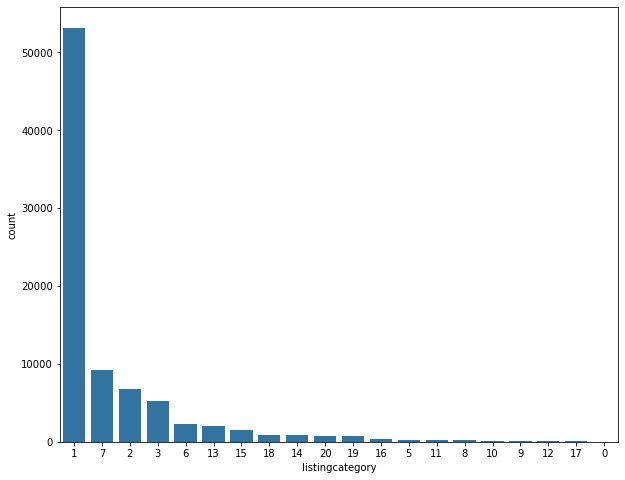

In [40]:
# Visualizing the listing categories

plt.figure(figsize = [10,8])
color = sb.color_palette()[0]
sort_order= df.listingcategory.value_counts().index
sb.countplot(data = df, x= 'listingcategory', color= color, order=sort_order);

From the chart above, the listing category 1 is the highest by a wide margin. This shows that most of the loans are for debt consolidation, followed by those borrowing for other reasons not listed(7). We then have those borrowing for home improvement(2), Business(3) and so on. On the other end, we see that the least reason for borrowing were for Rv, Green loans, Boat and cosmetic procedure.

The full category of the listing that the borrower selected when posting their listing is: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

Visualizing the Terms of Loans Given

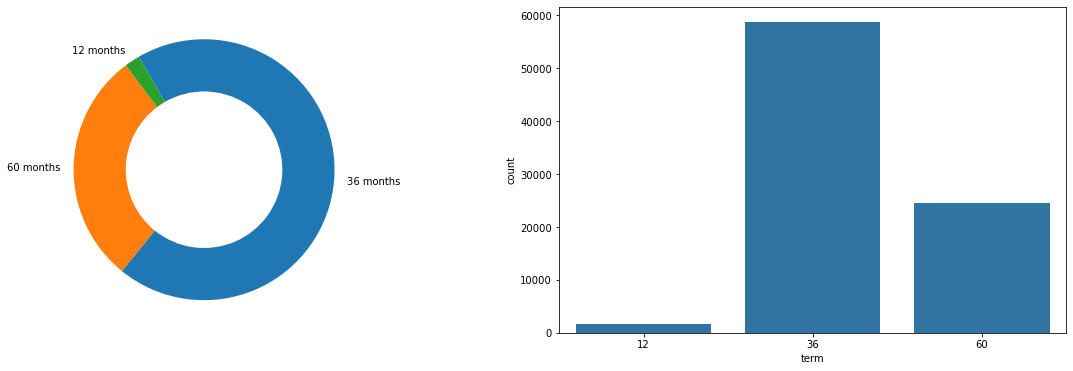

In [41]:
plt.figure(figsize = [20,6])

plt.subplot(1,2,1)
labels= ['36 months','60 months', '12 months']
sorted_term = df['term'].value_counts()
plt.pie(sorted_term, startangle = 120,labels=labels, counterclock = False, wedgeprops={'width':0.4})

plt.subplot(1,2,2)
color = sb.color_palette()[0]
sb.countplot(data = df, x= 'term', color= color);

   From the charts above, a large percentage of the loan terms are 36 months, less than half of the loans are for 60 months, while a very little percentage of the term of loans given is for 12 months.

We also need to visualize the number of loans given in each of the years (2009 - 2014). 

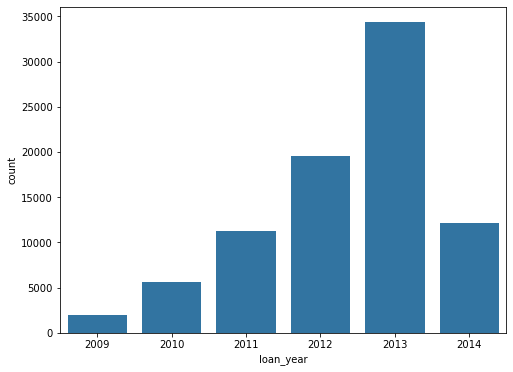

In [42]:
# Visualizing the number of loans given in each of the years(2009 - 2014). 
plt.figure(figsize = [8,6])
color = sb.color_palette()[0]
sb.countplot(data = df, x= 'loan_year', color= color);

From the bar chart for the loan years displayed above, we clearly see that very little loan was given in 2009, while a huge amount of loan was granted in 2013.

Let us now visualize the distribution of the quantitative variables.

In [43]:
 df.describe()

,term,borrowerrate,lenderyield,prosperrating_num,listingcategory,availablebankcardcredit,statedmonthlyincome,loanmonthssinceorigination,loanoriginalamount,monthlyloanpayment,investors,loan_year
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000
mean,42.486135,0.196022,0.186017,4.072243,3.312647,11400.695355,5.931175e+03,16.023452,9083.440515,291.930720,68.264669,2012.357972
std,11.640346,0.074631,0.074631,1.673227,4.364277,18610.424333,8.239944e+03,13.897523,6287.860058,186.678314,95.195831,1.206370
min,12.000000,0.040000,0.030000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.000000,0.000000,1.000000,2009.000000
25%,36.000000,0.135900,0.125900,3.000000,1.000000,1148.000000,3.434000e+03,4.000000,4000.000000,157.330000,1.000000,2012.000000
50%,36.000000,0.187500,0.177500,4.000000,1.000000,4574.000000,5.000000e+03,11.000000,7500.000000,251.940000,32.000000,2013.000000
75%,60.000000,0.257400,0.247400,5.000000,3.000000,13910.000000,7.083333e+03,25.000000,13500.000000,388.350000,97.000000,2013.000000
max,60.000000,0.360000,0.340000,7.000000,20.000000,498374.000000,1.750003e+06,56.000000,35000.000000,2251.510000,1189.000000,2014.000000


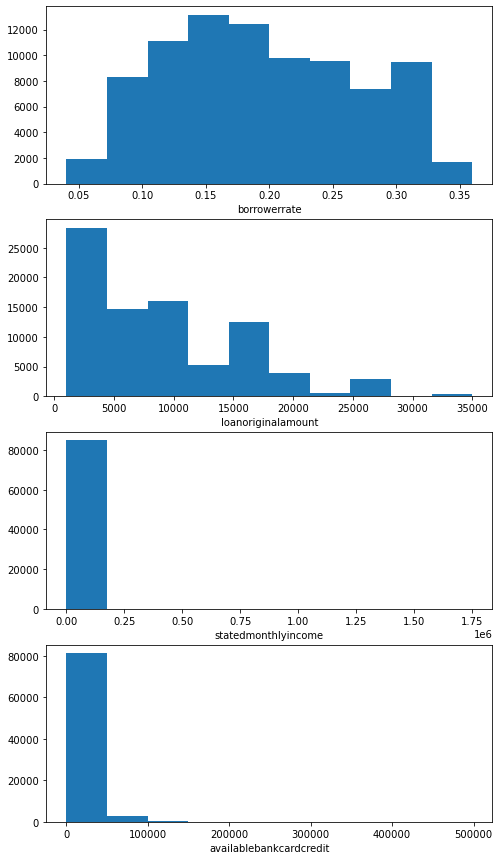

In [44]:
# Visualizing the  distribution of the relevant qualitative variables

fig, ax = plt.subplots(nrows= 4, figsize = [8,15])

variables = ['borrowerrate', 'loanoriginalamount', 'statedmonthlyincome','availablebankcardcredit']
for i in range(len(variables)):
    var = variables[i]
    ax[i].hist(data = df, x = var)
    ax[i].set_xlabel('{}'.format(var))
    
plt.show()

Borrower rate ranges from 0.04 and 0.36 (4% and 36%). Fewer loans were given around these lowest and highest rates. Majority of the loan were granted at rates in-between. <br>

Two variables of interest, statedmonthlyincome and availablebankcredit are completely skewed to the right. These will be further visualised alongside loan original amount, so that we can see the distribution of values better. 

In [45]:
# Descriptive statistic of the loanoriginalamount column
df.loanoriginalamount.describe()

count    84853.000000
mean      9083.440515
std       6287.860058
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13500.000000
max      35000.000000
Name: loanoriginalamount, dtype: float64

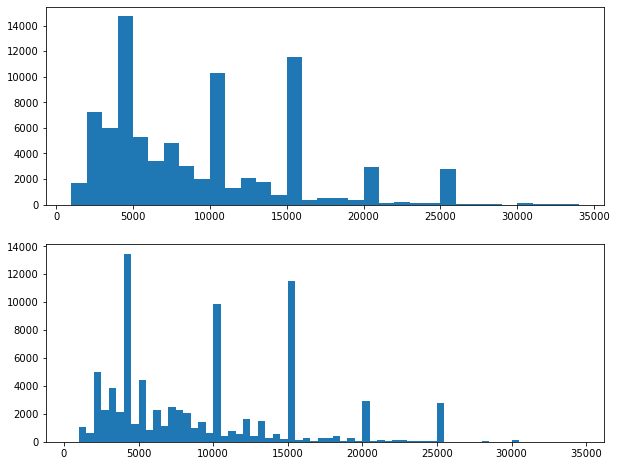

In [46]:
# Further visualizing the distribution of loanoriginalamount

plt.figure(figsize=[10,8])
bins=np.arange(1000,35000,1000)
bin_edge=np.arange(500,35000,500)

plt.subplot(2,1,1)
plt.hist(data=df, x='loanoriginalamount', bins=bins);

plt.subplot(2,1,2)
plt.hist(data=df, x='loanoriginalamount', bins =bin_edge);


From the distribution of the loan original amount, we see that the borrowers have taken loans from 1,000 dollars upwards. The maximum amount borrowed has been 35,000 dollars and borrowers have taken loans mostly of 4,000 dollars, 15,000 dollars and 10,000 dollars.

In [47]:
# Descriptive statistic of the statedmonthlyincome column
df.statedmonthlyincome.describe()

count    8.485300e+04
mean     5.931175e+03
std      8.239944e+03
min      0.000000e+00
25%      3.434000e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: statedmonthlyincome, dtype: float64

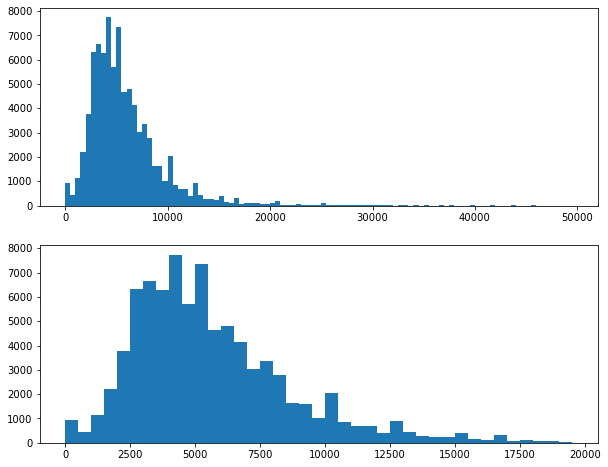

In [48]:
# Further visualizing the statedmonthlyincome column

plt.figure(figsize=[10,8])
bins=np.arange(0,50000,500)
bin_edge=np.arange(0,20000,500)

plt.subplot(2,1,1)
plt.hist(data=df, x='statedmonthlyincome', bins=bins);

plt.subplot(2,1,2)
plt.hist(data=df, x='statedmonthlyincome', bins=bin_edge);


From the distribution above, most borrowers earn between 2,500 and 7,000 dollars monthly. Very few borrowers earn up to 20,000 dollars monthly.

In [49]:
# Descriptive statistic of the availablebankcardcredit column
df.availablebankcardcredit.describe()

count     84853.000000
mean      11400.695355
std       18610.424333
min           0.000000
25%        1148.000000
50%        4574.000000
75%       13910.000000
max      498374.000000
Name: availablebankcardcredit, dtype: float64

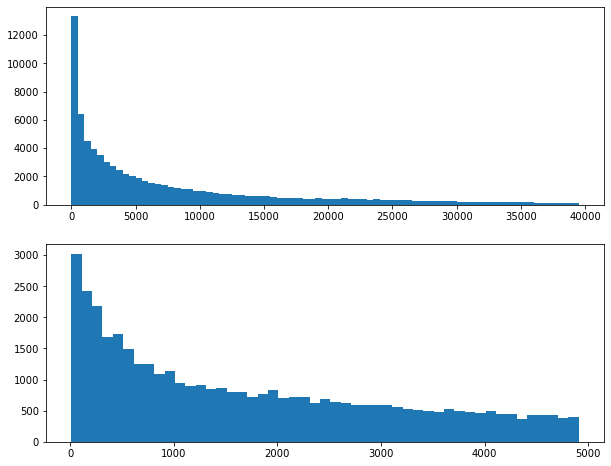

In [50]:
# Further visualizing the distribution of available bank card credit

plt.figure(figsize=[10,8])
bins=np.arange(0,40000,500)
bin_edge=np.arange(10,5000,100)

plt.subplot(2,1,1)
plt.hist(data=df, x='availablebankcardcredit', bins=bins);

plt.subplot(2,1,2)
plt.hist(data=df, x='availablebankcardcredit', bins=bin_edge);


From the distribution above, most borrowers have less than 5,000 available bank card credit. A few actually have 0 available bank card credit.

In [51]:
# Confirming the number of people who have zero available bank card credit.
(df.availablebankcardcredit == 0).sum()

2434

## Bivariate Exploration

Here, we shall look closely and most importantly at the relationship and interaction between prosper rating and the other variables of interest

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   term                        84853 non-null  int64   
 1   loanstatus                  84853 non-null  object  
 2   borrowerrate                84853 non-null  float64 
 3   lenderyield                 84853 non-null  float64 
 4   prosperrating_num           84853 non-null  int64   
 5   prosperrating_alpha         84853 non-null  category
 6   prosperscore                84853 non-null  category
 7   listingcategory             84853 non-null  int64   
 8   occupation                  83520 non-null  object  
 9   employmentstatus            84853 non-null  object  
 10  availablebankcardcredit     84853 non-null  float64 
 11  incomerange                 84853 non-null  object  
 12  statedmonthlyincome         84853 non-null  float64 
 13  loanmonthssince

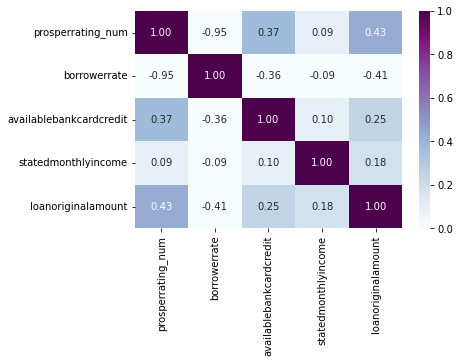

In [53]:
# Checking the correlation of the qualitative variables of interest.

num_values=['prosperrating_num','borrowerrate', 'availablebankcardcredit', 'statedmonthlyincome', 'loanoriginalamount']
sb.heatmap(df[num_values].corr(), cmap='BuPu', annot=True, fmt='.2f', vmin= 0);

From the correlation matrix, we see that there is a strong negative relationship between prosper rating and borrower rate. This means that, when borrower rates are high, loans/borrowers tend to be assigned worse prosper rating and when borrower rates are low, loans/borrowers tend to have better prosper rating. <br>

Prosper rating has a positive relationship with other variables, though not strong relationships. This means that higher available bank credit, stated monthly income and loan original amount are associated with better prosper ratings, and vice versa. 

We also note that borrower rate has a negative relationship with all the variables in consideration.

### Checking the distribution/relationship between the quantitative variables and prosper rating

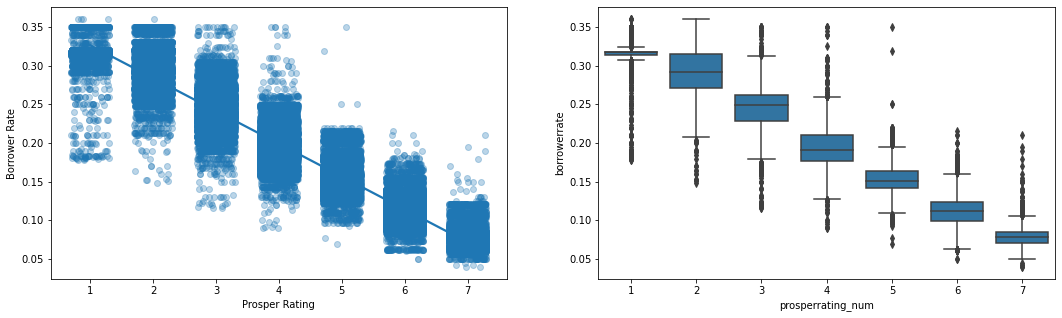

In [54]:
# Plotting a scatter plot and box plot for prosperrating_num and borrowerrate.

plt.figure(figsize = [18,5])

plt.subplot(1,2,1)
color = sb.color_palette()[0]
sb.regplot(data=df, x='prosperrating_num', y='borrowerrate',color=color, x_jitter=0.3, scatter_kws={'alpha':0.3})
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower Rate');

plt.subplot(1,2,2)
sb.boxplot(data=df, x='prosperrating_num', y='borrowerrate', color=color);

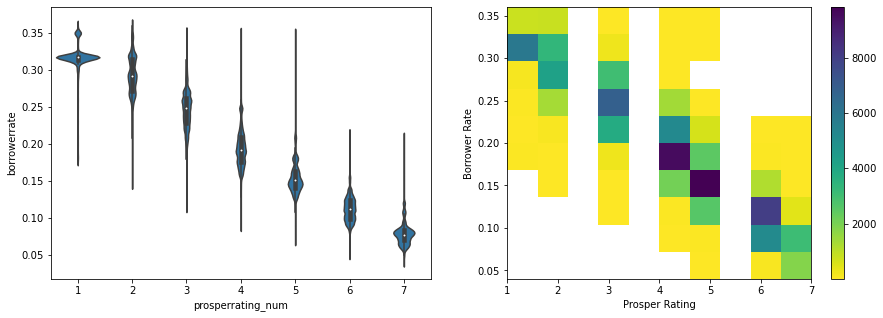

In [55]:
# Plotting a violin plot and a heatmap for prosperrating_num and borrowerrate

plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
sb.violinplot(data=df, x='prosperrating_num', y='borrowerrate', color=color);

plt.subplot(1,2,2)
plt.hist2d(data=df, x='prosperrating_num', y='borrowerrate', cmap='viridis_r', cmin=0.5)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower Rate')
plt.colorbar();

From the scatter plot and boxplot above, we confirm that at higher borrower rates, loans tend to have worse-off prosper rating than at lower borrower rates. <br>

The violin plot and heatmap also clearly help us to see that most loans were granted at borrower rates which fall very close to the median rate for each of the prosper ratings, but as the borrower rate fell, we see that prosper rating increased

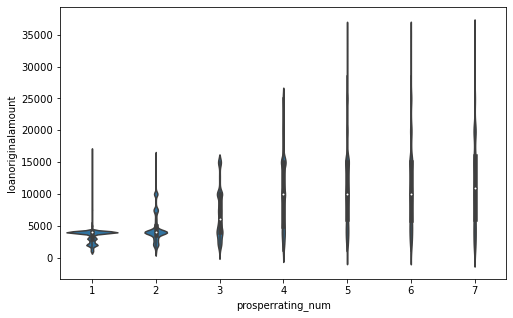

In [56]:
# Plotting a violin plot for prosperrating_num and loanoriginalamount

plt.figure(figsize = [8,5])

sb.violinplot(data=df, x='prosperrating_num', y='loanoriginalamount', color=color);

The chart above shows that the most loan original amounts are less than 5,000 dollars and have mostly ratings 1 and 2. Individuals with ratings from 3 upwards have borrowed amounts distributed largely between 0 and 15,000 dollars.

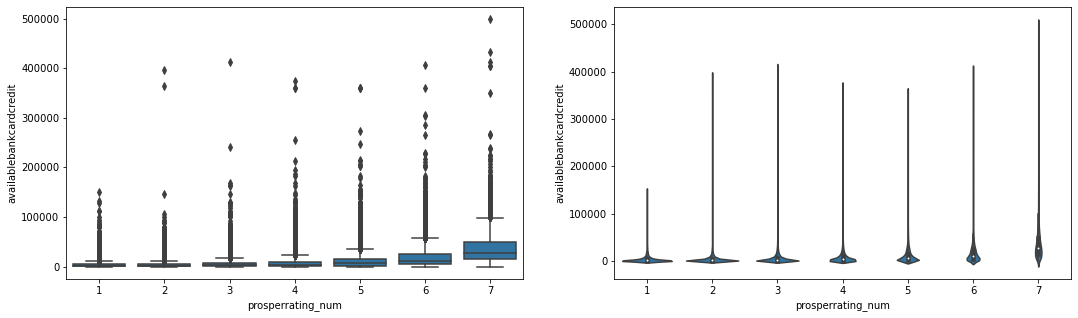

In [57]:
# Plotting a box plot and a violin plot for prosperrating_num and availablebankcardcredit

plt.figure(figsize = [18,5])

plt.subplot(1,2,1)
sb.boxplot(data=df, x='prosperrating_num', y='availablebankcardcredit', color=color);

plt.subplot(1,2,2)
sb.violinplot(data=df, x='prosperrating_num', y='availablebankcardcredit', color=color);

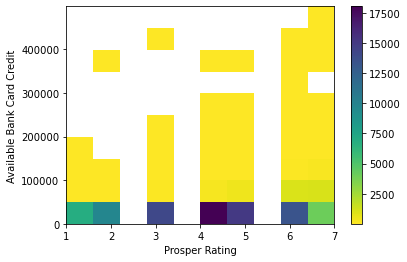

In [58]:
plt.hist2d(data=df, x='prosperrating_num', y='availablebankcardcredit', cmap='viridis_r', cmin=0.5)
plt.xlabel('Prosper Rating')
plt.ylabel('Available Bank Card Credit')
plt.colorbar();

It's been established that most borrowers have available bank card credits less than 2,500 dollars. The heatmap above shows us that are good number of these borrowers who have relatively low available bank card credit are rated between 3 and 6, with majority rated 4, which is the median rating.<br>
  
More borrowers with greater available bank credits are rated among the best. 

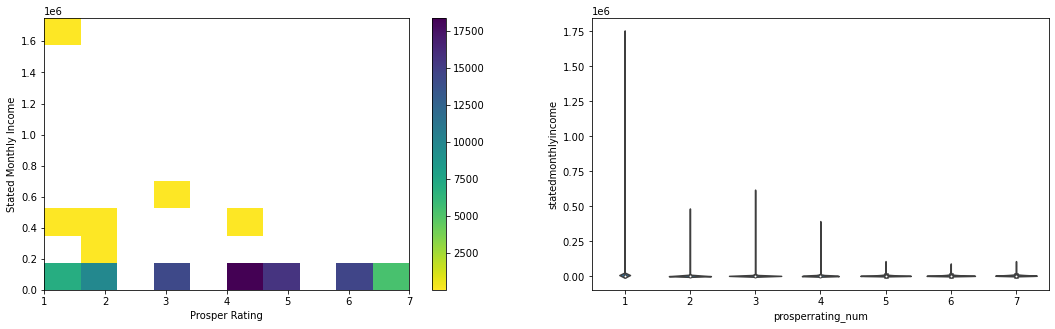

In [59]:
plt.figure(figsize = [18,5])

plt.subplot(1,2,1)
plt.hist2d(data=df, x='prosperrating_num', y='statedmonthlyincome', cmap='viridis_r', cmin=0.01)
plt.xlabel('Prosper Rating')
plt.ylabel('Stated Monthly Income')
plt.colorbar();

plt.subplot(1,2,2)
sb.violinplot(data=df, x='prosperrating_num', y='statedmonthlyincome', color=color);

Most borroweres have very low stated monthly incomes, with few of them rated 1.

Let us now try to find out the group of individuals based on employment status who have more average prosper rating and those who have the least prosper rating. We keep in mind that some of these groups have very few borrowers listed.<br>

The plot below answers the question, "what is the average prosper rating of borrowers of various status of employment?" It gives us the range of the rating of individuals of various employment status. 

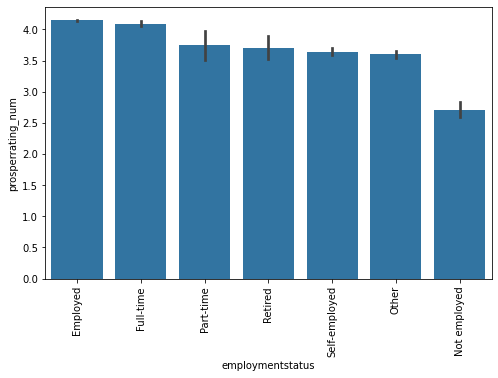

In [60]:
plt.figure(figsize = [8,5])
occ=df.groupby('employmentstatus').prosperrating_num.mean().sort_values(ascending=False).index
color = sb.color_palette()[0]
sb.barplot(data=df, x= 'employmentstatus', y='prosperrating_num', order=occ, color=color)
plt.xticks(rotation=90);

From the barplot above, we see that employed individuals have the highest prosper rating on average. They tend to have a prosper rating above 4. The short error bar confirms this rating is very likely to be the case for most employed. Individuals employed in various ways, part-time, full-time and the retired all have an average prosper rating above 3. The unemployed however have the least average prosper rating which is below 3.

The plot below answers the question, what is the average prosper rating of borrowers of various occupations. It gives us the range of the rating of various occupations. 

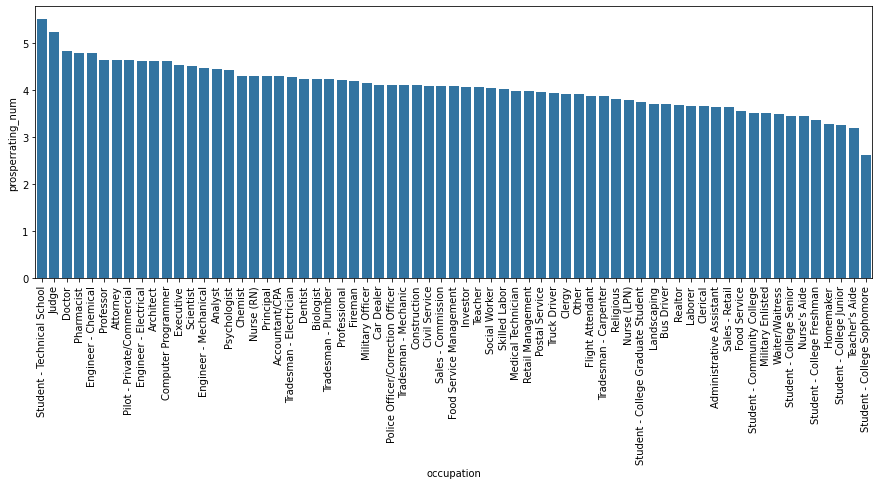

In [61]:
plt.figure(figsize = [15,5])
occ=df.groupby('occupation').prosperrating_num.mean().sort_values(ascending=False).index
color = sb.color_palette()[0]
sb.barplot(data=df, x= 'occupation', y='prosperrating_num',order=occ, color=color, ci=None)
plt.xticks(rotation=90);

Let us visualize only the top and bottom five occupations based on their average prosper rating

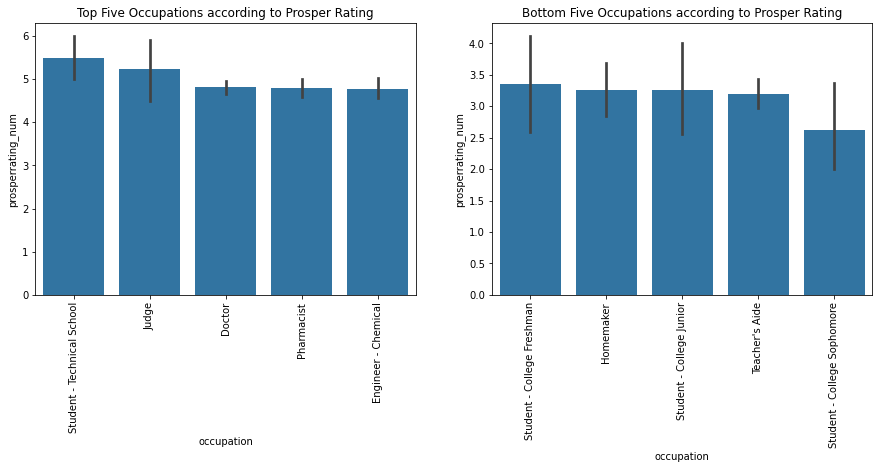

In [62]:
plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
occ=df.groupby('occupation').prosperrating_num.mean().sort_values(ascending=False).head().index
color = sb.color_palette()[0]
sb.barplot(data=df, x= 'occupation', y='prosperrating_num',order=occ, color=color)
plt.title("Top Five Occupations according to Prosper Rating")
plt.xticks(rotation=90);

plt.subplot(1,2,2)
occ=df.groupby('occupation').prosperrating_num.mean().sort_values(ascending=False).tail().index
color = sb.color_palette()[0]
sb.barplot(data=df, x= 'occupation', y='prosperrating_num',order=occ, color=color)
plt.title("Bottom Five Occupations according to Prosper Rating")
plt.xticks(rotation=90);

From the barplots above, we see that students of technical schools have the highest average prosper rating. They tend to have on average a prosper rating above 5, judges do as well. Doctors, pharmacists and chemical engineers also have high average prosper ratings.<br>
On the other hand,low rated occupations have average ratings above 3, except college sophomore students, whose loans have the least average prosper rating of below 3.

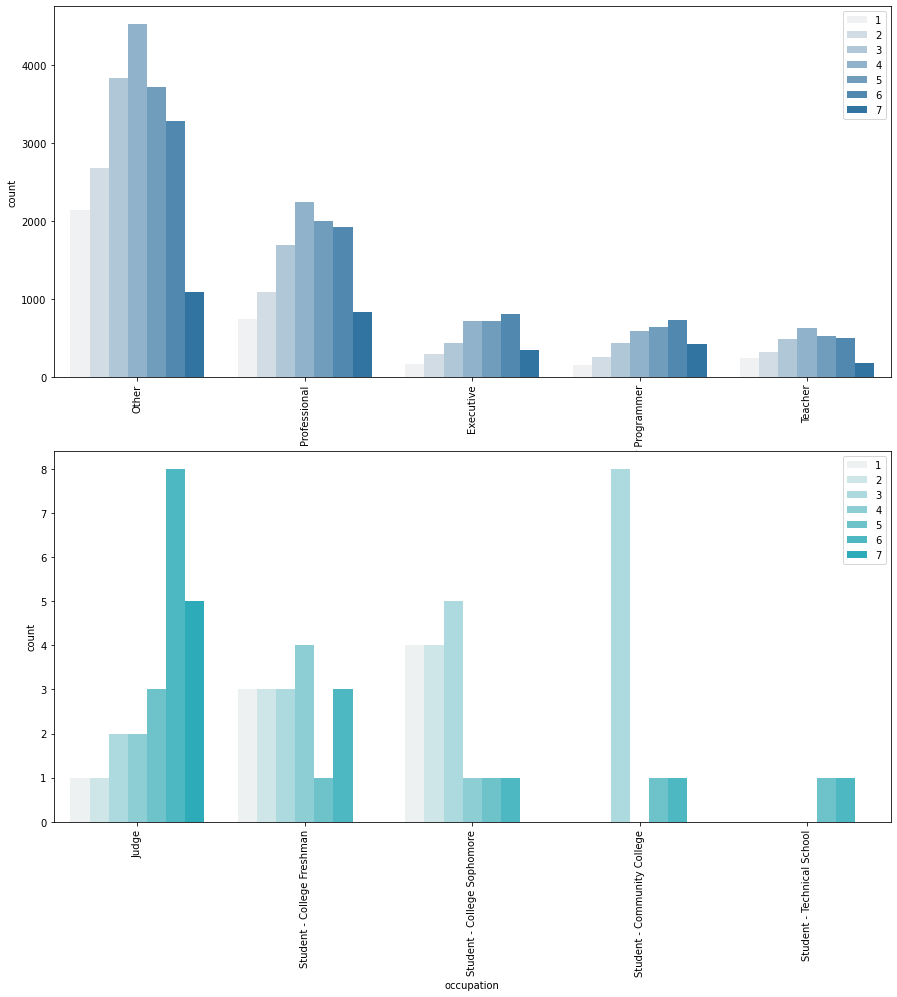

In [63]:
# Visualizing the number of each prosper rating assigned to the top and bottom five occupations

plt.figure(figsize = [15,15])

plt.subplot(2,1,1)
sort_occ= df.occupation.value_counts().head().index
color = sb.color_palette()[0]
sb.countplot(data = df, x= 'occupation', hue='prosperrating_num', color= color, order=sort_occ)
plt.legend(loc=1)
plt.xticks(rotation=90);

plt.subplot(2,1,2)
sort_occ= df.occupation.value_counts().tail().index
color = sb.color_palette()[9]
sb.countplot(data = df, x= 'occupation',hue='prosperrating_num', color= color,  order=sort_occ)
plt.legend(loc=1)
plt.xticks(rotation=90);

The plots above simply show that both the highest borrowing occupations and the least borrowing occcupations have been assigned more high and fair enough prosper ratings in the loans borrowed when compared with low ratings assigned. 4 and 6 have been the most recorded for various occcupations, especially the top borrowers. 

Looking generally at prosper rating over the years.

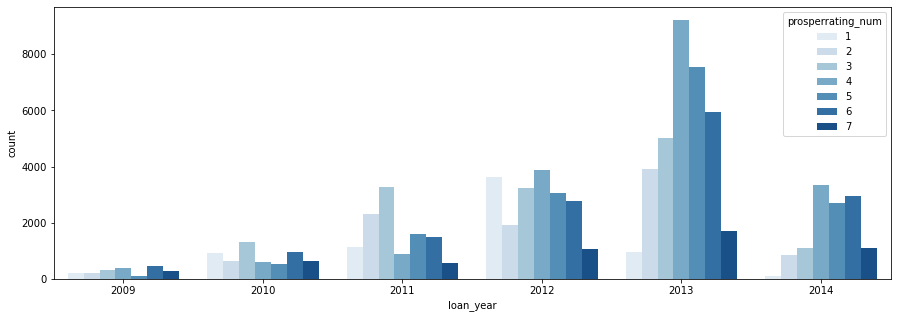

In [64]:
plt.figure(figsize=[15,5])
sb.countplot(data=df, x='loan_year', hue='prosperrating_num', palette='Blues');

Generally, prosper ratings assigned to loans across the years have been quite inconsistent. For most years however, the central ratings, such as 3, 4 and 5 have been the highest rating. This means the risk levels of loans have been more on the average over the years.<br>

In the earlier years, most loans were rated 3, there was a little improvement in the later years - 2012, 2013 and 2014, where the highest rating assigned to loans was 4.

## Multivariate Exploration

We shall now interact more than two varaibles to find more insights

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   term                        84853 non-null  int64   
 1   loanstatus                  84853 non-null  object  
 2   borrowerrate                84853 non-null  float64 
 3   lenderyield                 84853 non-null  float64 
 4   prosperrating_num           84853 non-null  int64   
 5   prosperrating_alpha         84853 non-null  category
 6   prosperscore                84853 non-null  category
 7   listingcategory             84853 non-null  int64   
 8   occupation                  83520 non-null  object  
 9   employmentstatus            84853 non-null  object  
 10  availablebankcardcredit     84853 non-null  float64 
 11  incomerange                 84853 non-null  object  
 12  statedmonthlyincome         84853 non-null  float64 
 13  loanmonthssince

Having seen the relationship between prosper rating and some quantitative variables, we will now look at their interactions in each year (2009-2014), keeping in mind that the best prosper rating is 1 and the least is 7.<br>

These line plots help us visualize the interaction of some of the variable with prosper rating across years in one plot.

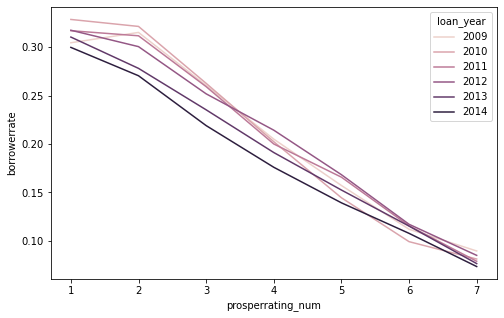

In [66]:
# Visualizing the relationship between prosper rating and borrower rate across years
plt.figure(figsize = [8,5])
sb.lineplot(data = df, x = 'prosperrating_num', y = 'borrowerrate', hue='loan_year', ci=None);

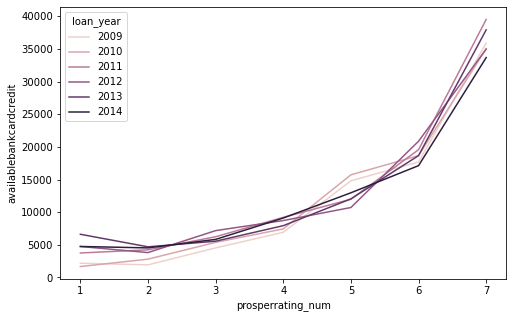

In [67]:
# Visualizing the relationship between prosper rating and available bank card credit across years
plt.figure(figsize = [8,5])
sb.lineplot(data = df, x = 'prosperrating_num', y = 'availablebankcardcredit', hue='loan_year', ci=None);

In the line plots above, borrower rate and available bank credit seem to have followed the same trend over the six years covered in this analysis. We observe that better prosper ratings have been associated with lower borrower rate and low prosper rating has been associate with higher borrower rate. This was maintained across the years. We also notice that the various borrower rates maintained similar prosper rating across the six years.<br>

Available bank card credit on its own path, maintained it's relationship across the six years, where lower available bank card credit remained associated with lower rating and vice versa. 

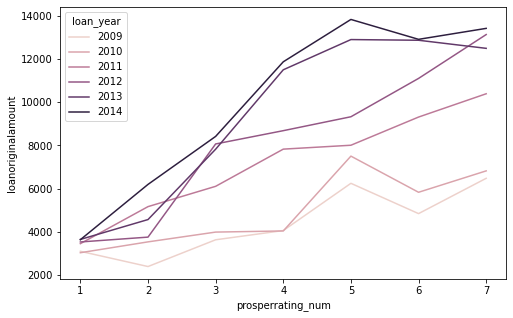

In [68]:
# Visualizing the relationship between prosper rating and loan original amount across years
plt.figure(figsize = [8,5])
sb.lineplot(data = df, x = 'prosperrating_num', y = 'loanoriginalamount', hue='loan_year', ci=None);

For loan original amount, while the relationship with prosper rating was largely positive across the years, the trend was not maintained. There was an improvement in prosper rating with increased loan amount as the years went on. There was also notable increase in loan_original amount as the years passed.

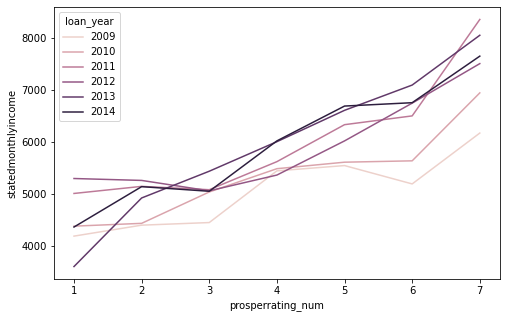

In [69]:
# Visualizing the relationship between prosper rating and stated monthly income across years
plt.figure(figsize = [8,5])
sb.lineplot(data = df, x = 'prosperrating_num', y = 'statedmonthlyincome', hue='loan_year', ci=None);

Stated monthly income maintained a fairly positive trend across the years. Lower stated monthly income was associated with lower prosper rating and vice versa. This was the case in the 6 years covered. We also note that, as the years passed, stated monthly income increased.

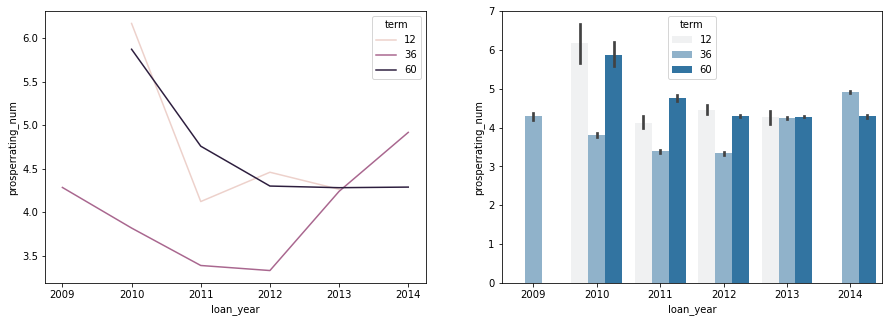

In [70]:
# Visualizing the interaction between prosper rating and loan year for the three loan terms

plt.figure(figsize = [15,5])

plt.subplot(1,2,1)
color = sb.color_palette()[0]
sb.lineplot(data=df, x='loan_year', y='prosperrating_num',hue= 'term', color=color, ci=None);


plt.subplot(1,2,2)
color = sb.color_palette()[0]
sb.barplot(data=df, x='loan_year', y='prosperrating_num',hue= 'term', color=color);


Looking at the prosper rating of the three terms of loans across the six years, we see that loans of 12 months have made better prosper ratings in most months where they were recorded, notably 2010, 2012 and 2013. Borrowers of loans of 60 months terms seem to be next in ranking across the years. In the later years however, 36 months loans have picked up in terms of prosper rating and surpassing the others, became the best rated loan term in 2014.

Let us now visualize the average prosper rating of the various employment status and selected occupations across years

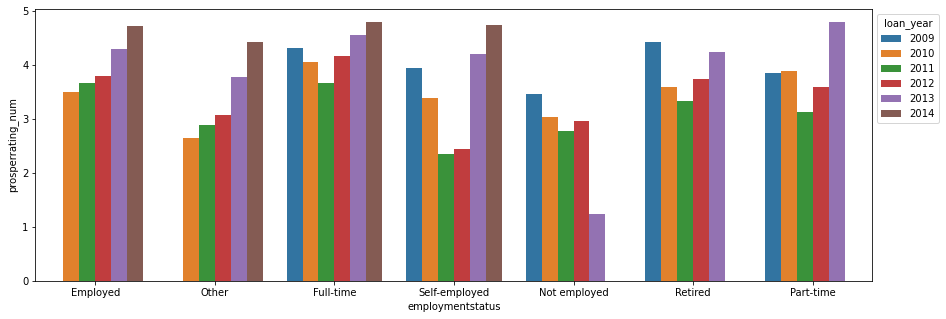

In [71]:
# Visualizing the average prosper rating of the various employment status across years

plt.figure(figsize = [15,5])
ax=sb.barplot(data=df, x='employmentstatus', y='prosperrating_num', hue='loan_year', ci=None)
sb.move_legend(ax, 'upper left',bbox_to_anchor=(1,1))

2014 was a year of good performance in terms of prosper rating, for the borrowers of various employment status. They all also seem to have had relatively low prosper ratings in 2011. Loans to the employed have maintained constant improvement in ratings over the years. Loans to the 'Other' group also has. Loans to the not employed have actually been largely getting lower prosper ratings as the years went by.

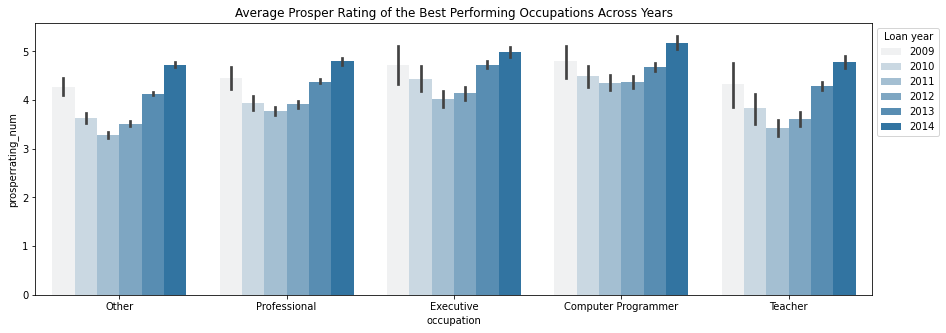

In [72]:
# Visualizing the average prosper rating of the best performing occupations across years

plt.figure(figsize = [15,5])

color = sb.color_palette()[0]
occ=df.occupation.value_counts().head().index
sb.barplot(data=df, x= 'occupation', y='prosperrating_num',hue= 'loan_year', order=occ, color=color)
plt.legend(bbox_to_anchor=(1,1)). set_title('Loan year')
plt.title('Average Prosper Rating of the Best Performing Occupations Across Years');

The best performing occupations in terms of prosper rating have generally performed increasingly better in recent years. They generally recorded low ratings in 2011, after which the ratings began to rise again. 

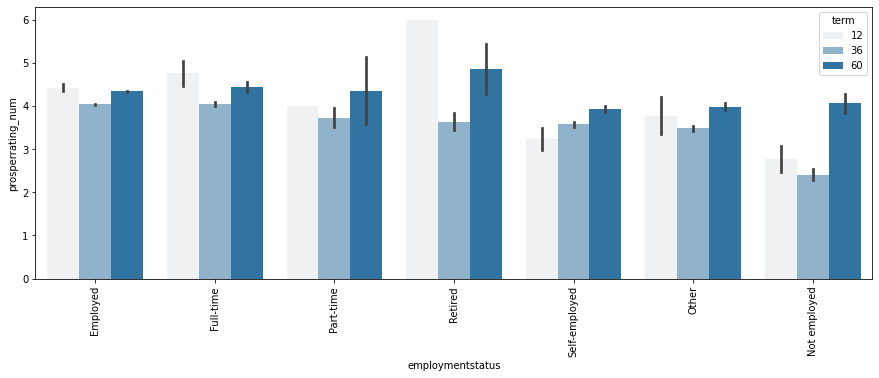

In [73]:
# Visualizing the average prosper rating of the various employment status for each loan term

plt.figure(figsize = [15,5])
occ=df.groupby('employmentstatus').prosperrating_num.mean().sort_values(ascending=False).index
color = sb.color_palette()[0]
sb.barplot(data=df, x= 'employmentstatus', y='prosperrating_num',hue='term', order=occ, color=color)
plt.xticks(rotation=90);

Very few borrowers have borrowed 12 month term loans, but they seem to be the better rated ones across most status of employment, as seen above.

## Summary of Findings and Conclusion

In the analysis carried out, I found that there was a strong negative association between the prosper rating of loans and the borrower rate. Loan original amount, stated monthly income and available bank card credit were found to have a positive, though not strong, association with prosper rating.

I also found that on average, loans given to the employed have a higher prosper rating compared to loans given to the unemployed and other workers. 

In addition, I found out that loans given to students of technical schools had the highest average prosper rating. Loans given to judges, doctors, pharmacists and chemical engineers also had high average prosper ratings.Other low rated occupations had average ratings above 3, except college sophomore students, whose loans had the least average prosper rating of below 3.

These results largely proved the same across the six years. We therefore conclude that:<br>
-some loan characteristics contribute to determining their prosper rating.<br>
-some category of borrowers are on average associated with a given level of prosper rating.
